****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

## Import proper packages and open and load the json file.

In [8]:
#import the pandas, json, and matplotlib.pyplot packages
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize

In [9]:
#set the filepath for the world bank projects data
file = 'data/world_bank_projects.json'

In [10]:
#have and initial look at the file 
with open(file) as json_file:
    json_data = json.load(json_file) 
print(type(json_data))
print(json_data[0])

<class 'list'>
{'sector': [{'Name': 'Primary education'}, {'Name': 'Secondary education'}, {'Name': 'Public administration- Other social services'}, {'Name': 'Tertiary education'}], 'supplementprojectflg': 'N', 'projectfinancialtype': 'IDA', 'prodline': 'PE', 'mjtheme': ['Human development'], 'idacommamt': 130000000, 'impagency': 'MINISTRY OF EDUCATION', 'project_name': 'Ethiopia General Education Quality Improvement Project II', 'mjthemecode': '8,11', 'closingdate': '2018-07-07T00:00:00Z', 'totalcommamt': 130000000, 'id': 'P129828', 'mjsector_namecode': [{'code': 'EX', 'name': 'Education'}, {'code': 'EX', 'name': 'Education'}, {'code': 'BX', 'name': 'Public Administration, Law, and Justice'}, {'code': 'EX', 'name': 'Education'}], 'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document', 'sector1': {'Percent': 46, 'Name': 'Primary education'}, 'lendinginstr': 'Investment Project Financing', 'countrycode': 'ET', 'sector2': {'Percent': 26, 'Name': 'Sec

In [11]:
#find out how many dicts are in the list of dicts
print(len(json_data))

500


## Find out the structure of the dicts in the list

In [12]:
json_data[0].keys()

dict_keys(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline', 'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode', 'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty', 'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt', 'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4', 'prodlinetext', 'productlinetype', 'regionname', 'status', 'country_namecode', 'envassesmentcategorycode', 'project_abstract', 'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype', 'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3', 'majorsector_percent', 'board_approval_month', 'theme_namecode', 'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt', 'sector_namecode', '_id'])

In [13]:
json_data[1].keys()

dict_keys(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline', 'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode', 'totalcommamt', 'id', 'mjsector_namecode', 'docty', 'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt', 'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'source', 'prodlinetext', 'productlinetype', 'regionname', 'status', 'country_namecode', 'envassesmentcategorycode', 'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype', 'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'majorsector_percent', 'board_approval_month', 'theme_namecode', 'countryname', 'url', 'projectstatusdisplay', 'ibrdcommamt', 'sector_namecode', '_id'])

## Each dict in the list is a project

In [14]:
#load list of dicts into a dataframe df and examine the info df
df = pd.DataFrame(json_data)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null object
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 no

## After looking at the dataframe info, a subset dataframe will be assembled with pertinent columns from the original dataframe into df_subset.

In [15]:
#Create the subset dataframe and look at its relevant info and structure.
#Then, check to see if each project has a unique id and thus the dataframe is free from duplicates.
df_subset = df[['id','project_name','regionname','countrycode','countryname']]
print(df_subset.info())
print(df_subset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
id              500 non-null object
project_name    500 non-null object
regionname      500 non-null object
countrycode     500 non-null object
countryname     500 non-null object
dtypes: object(5)
memory usage: 19.6+ KB
None
        id                                       project_name  \
0  P129828  Ethiopia General Education Quality Improvement...   
1  P144674          TN: DTF Social Protection Reforms Support   
2  P145310  Tuvalu Aviation Investment Project - Additiona...   
3  P144665   Gov't and Civil Society Organization Partnership   
4  P144933  Second Private Sector Competitiveness and Econ...   

                     regionname countrycode  \
0                        Africa          ET   
1  Middle East and North Africa          TN   
2         East Asia and Pacific          TV   
3  Middle East and North Africa          RY   
4                        Africa          LS 

In [16]:
#check to see if each entry has a unique id; an error is thrown if each id isn't unique in the dataframe.
assert df_subset.id.value_counts()[0]==1

## Now find the top counts of projects per country.

In [17]:
#find unique cases of countryname and counts of those unique appearances in the dataframe
countries = df_subset.countryname.value_counts()
print(countries)

Republic of Indonesia                       19
People's Republic of China                  19
Socialist Republic of Vietnam               17
Republic of India                           16
Republic of Yemen                           13
Nepal                                       12
People's Republic of Bangladesh             12
Kingdom of Morocco                          12
Africa                                      11
Republic of Mozambique                      11
Islamic Republic of Pakistan                 9
Federative Republic of Brazil                9
Burkina Faso                                 9
United Republic of Tanzania                  8
Republic of Tajikistan                       8
Republic of Armenia                          8
Hashemite Kingdom of Jordan                  7
Federal Republic of Nigeria                  7
Lao People's Democratic Republic             7
Kyrgyz Republic                              7
Islamic State of Afghanistan                 6
West Bank and

## There are entries with Africa as the country.  Africa is a continent.  Looking into these cases.  It seems that the Africa entries and other non country countryname entities are multiregional projects.  

In [18]:
#select only entries that have Africa as entries in the countryname column
df_Africa = df_subset.loc[df_subset.countryname == 'Africa']
df_Africa

,id,project_name,regionname,countrycode,countryname
45,P125018,West Africa Regional Disease Surveillance Cap...,Africa,3A,Africa
46,P118213,RCIP4 - Regional Communications Infrastructure...,Africa,3A,Africa
51,P130888,"Building Resilience through Innovation, Commun...",Africa,3A,Africa
58,P144902,Fighting against wildlife poaching and illegal...,Africa,3A,Africa
65,P075941,Regional Rusumo Falls Hydroelectric Project,Africa,3A,Africa
99,P145160,Additional Financing-West Africa Agricultural ...,Africa,3A,Africa
167,P123093,West Africa Regional Communications Infrastruc...,Africa,3A,Africa
184,P120370,Southern Africa Trade and Transport Facilitati...,Africa,3A,Africa
287,P094183,Agricultural Productivity Program for Southern...,Africa,3A,Africa
353,P130694,Nile Cooperation for Results Project,Africa,3A,Africa


## Taking into account multiregional entries as a country entity.  The following is a listing of the top 10 countries for number of projects.

In [19]:
#Working out a way to single out region from the df_subset
region = df_subset.loc[df_subset['countryname']=='Republic of Indonesia']['regionname'].drop_duplicates().values[0]
region

'East Asia and Pacific'

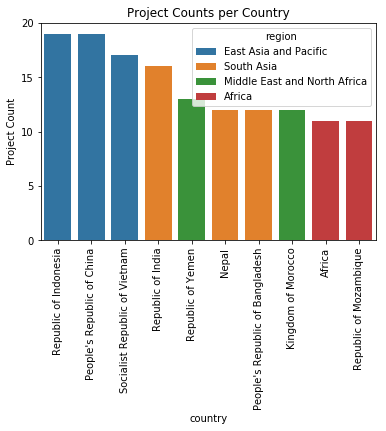

,project_counts,region
country,,
Republic of Indonesia,19,East Asia and Pacific
People's Republic of China,19,East Asia and Pacific
Socialist Republic of Vietnam,17,East Asia and Pacific
Republic of India,16,South Asia
Republic of Yemen,13,Middle East and North Africa
Nepal,12,South Asia
People's Republic of Bangladesh,12,South Asia
Kingdom of Morocco,12,Middle East and North Africa
Africa,11,Africa


In [20]:
#Create a series of the top ten countries from the countries value counts created earlier.
#Add regionname column to the series.
#Then plot a bar chart of the data, with hue set by country region.
top10countries = countries[0:10]
top10countries = pd.DataFrame(top10countries)
top10countries['regionname'] = [df_subset.loc[df_subset.countryname==index]['regionname'].drop_duplicates().values[0] for index in top10countries.index]
#change the column names and index name
top10countries.columns = [['project_counts','region']]
top10countries.index.names = ['country']
#Create plot
sns.barplot(x=top10countries.index, y='project_counts',data=top10countries, hue = 'region', dodge = False)
plt.title('Project Counts per Country')
plt.xticks(rotation=90)
plt.yticks(range(0,21,5))
plt.ylabel('Project Count')
plt.show()
top10countries

## Now onto finding the top 10 project themes.  Upon exploring the theme data, the missing name data is represented as blanks.  These will be edited and given the correct name based on the corresponding theme code.

In [21]:
#normalize the mjtheme_namecode column into its own dataframe themes and set index to code and sort by index
themes = json_normalize(json_data,'mjtheme_namecode',['countryname','regionname']).sort_values('code').reset_index()
del(themes['index'])
#see info about themes
print(themes.info())
print(themes.name.value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
code           1499 non-null object
name           1499 non-null object
countryname    1499 non-null object
regionname     1499 non-null object
dtypes: object(4)
memory usage: 46.9+ KB
None
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64


In [22]:
#First form a dictionary with codes as keys and names as values.
namecode = {}
for index, row in themes.iterrows():
    code = row['code']
    name = row['name']
    if code not in namecode.keys() & name != '':
        namecode[code] = name
#inspect the dictionary
print(namecode)    

{'1': 'Economic management', '10': 'Rural development', '11': 'Environment and natural resources management', '2': 'Public sector governance', '3': 'Rule of law', '4': 'Financial and private sector development', '5': 'Trade and integration', '6': 'Social protection and risk management', '7': 'Social dev/gender/inclusion', '8': 'Human development', '9': 'Urban development'}


In [23]:
#Now go through blanks in themes and pull the proper value from the namecode dictionary.
for index, row in themes.iterrows():
    if row['name'] == '':
        row['name'] = namecode[row['code']]
#inspect blanks to see if all names have been filled
assert themes.name.any() != ''

## Now that the blank values have been filled in, we can get the top 10 overall project themes and visualize the themes per region.

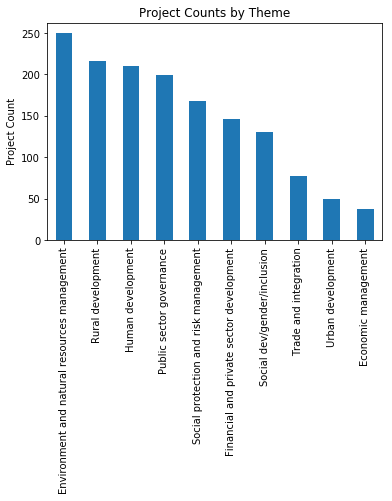

In [24]:
#plot top 10 themes in barplot

top10themes = themes.name.value_counts()[0:10]
top10themes.plot(kind='bar')
plt.title('Project Counts by Theme')
plt.ylabel('Project Count')
plt.show()

## Taking a further look into the project themes by region and creating a visual plot to display the data.

In [25]:
#make a new table pivoted on theme name and region
pivot_themes = pd.pivot_table(themes,index='name',columns='regionname',values='code',aggfunc='count', fill_value=0)

pivot_themes

regionname,Africa,East Asia and Pacific,Europe and Central Asia,Latin America and Caribbean,Middle East and North Africa,Other,South Asia
name,,,,,,,
Economic management,11,6,8,6,5,0,2
Environment and natural resources management,62,56,44,27,25,4,32
Financial and private sector development,59,34,18,7,18,0,10
Human development,66,28,32,24,20,1,39
Public sector governance,74,31,26,29,19,0,20
Rule of law,6,2,4,2,0,0,1
Rural development,76,37,33,21,14,1,34
Social dev/gender/inclusion,32,23,11,18,18,1,27
Social protection and risk management,47,24,19,34,24,0,20


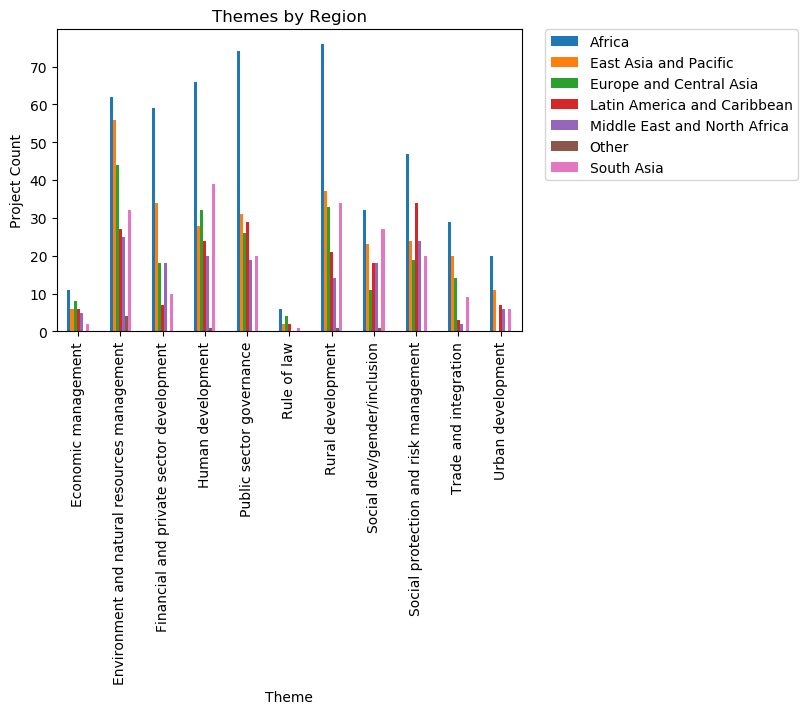

In [48]:
#Create plot of the project themes by region.
pivot_themes.plot(kind='bar',)
plt.ylabel('Project Count')
plt.xlabel('Theme')
plt.title('Themes by Region')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
mpl.rcParams['figure.dpi']=mpl.rcParamsDefault['figure.dpi'] * 1.2
plt.show()